In [4]:
using FilePaths, VegaLite, CSV, DataFrames, StatsKit, Plots, VegaDatasets, Query; gr();

path = p"C:\\Users\\kkarb\\OneDrive\\Pulpit\\2016-2022.csv"
df = DataFrame(CSV.File(path))


(process:10004): GLib-GIO-WARNING **: 17:53:25.137: Unexpectedly, UWP app `Evernote.Evernote_10.33.5.0_x86__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs


107690×31 DataFrame
    Row │ data_id  iso    event_id_cnty  event_id_no_cnty  event_date       ye ⋯
        │ Int64    Int64  String15       Float64           String31         In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 8912977    356  IND107923              107923.0  18 March 2022     2 ⋯
      2 │ 8912990    356  IND107846              107846.0  18 March 2022     2
      3 │ 8913012    356  IND107941              107941.0  18 March 2022     2
      4 │ 8913089    356  IND107842              107842.0  18 March 2022     2
      5 │ 8913091    356  IND107850              107850.0  18 March 2022     2 ⋯
      6 │ 8913095    356  IND107873              107873.0  18 March 2022     2
      7 │ 8913119    356  IND107754              107754.0  18 March 2022     2
      8 │ 8913123    356  IND107752              107752.0  18 March 2022     2
   ⋮    │    ⋮       ⋮          ⋮               ⋮                 ⋮            ⋱
 107684 │ 5492810    356  IND7                        7.0  01 January 2016   2 ⋯
 107685 │ 5493466    356  IND8                        8.0  01 January 2016   2
 107686 │ 5494159    356  IND9                        9.0  01 January 2016   2
 107687 │ 5603486    356  IND51303                51303.0  01 January 2016   2
 107688 │ 6072644    356  IND49232                49232.0  01 January 2016   2 ⋯
 107689 │ 6257234    356  IND10                      10.0  01 January 2016   2
 107690 │ 8543376    356  IND49233                49233.0  01 January 2016   2
                                              26 columns and 107675 rows omitted

In [7]:
#wykorzystałam element kodu Hani by stworzyć mapki roczne
df_2016 = @from i in df begin
    @where i.year == 2016
    @select {i.event_date, i.event_type, i.sub_event_type, i.location, i.latitude, i.longitude}
    @collect DataFrame
end
df_2016

13366×6 DataFrame
   Row │ event_date        event_type                  sub_event_type    locat ⋯
       │ String31          String31                    String            Strin ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ 31 December 2016  Protests                    Peaceful protest  Agra  ⋯
     2 │ 31 December 2016  Violence against civilians  Sexual violence   Chenn
     3 │ 31 December 2016  Riots                       Mob violence      Kadap
     4 │ 31 December 2016  Protests                    Peaceful protest  Raman
     5 │ 31 December 2016  Riots                       Mob violence      Thiru ⋯
     6 │ 31 December 2016  Battles                     Armed clash       Handw
     7 │ 31 December 2016  Protests                    Peaceful protest  Nager
     8 │ 31 December 2016  Protests                    Peaceful protest  Mandy
   ⋮   │        ⋮                      ⋮                      ⋮                ⋱
 13360 │ 01 January 2016   Protests                    Peaceful protest  Bathi ⋯
 13361 │ 01 January 2016   Protests                    Peaceful protest  Karna
 13362 │ 01 January 2016   Protests                    Peaceful protest  Ludhi
 13363 │ 01 January 2016   Battles                     Armed clash       Kokra
 13364 │ 01 January 2016   Protests                    Peaceful protest  Pulwa ⋯
 13365 │ 01 January 2016   Battles                     Armed clash       Naray
 13366 │ 01 January 2016   Protests                    Peaceful protest  Srina
                                                3 columns and 13351 rows omitted

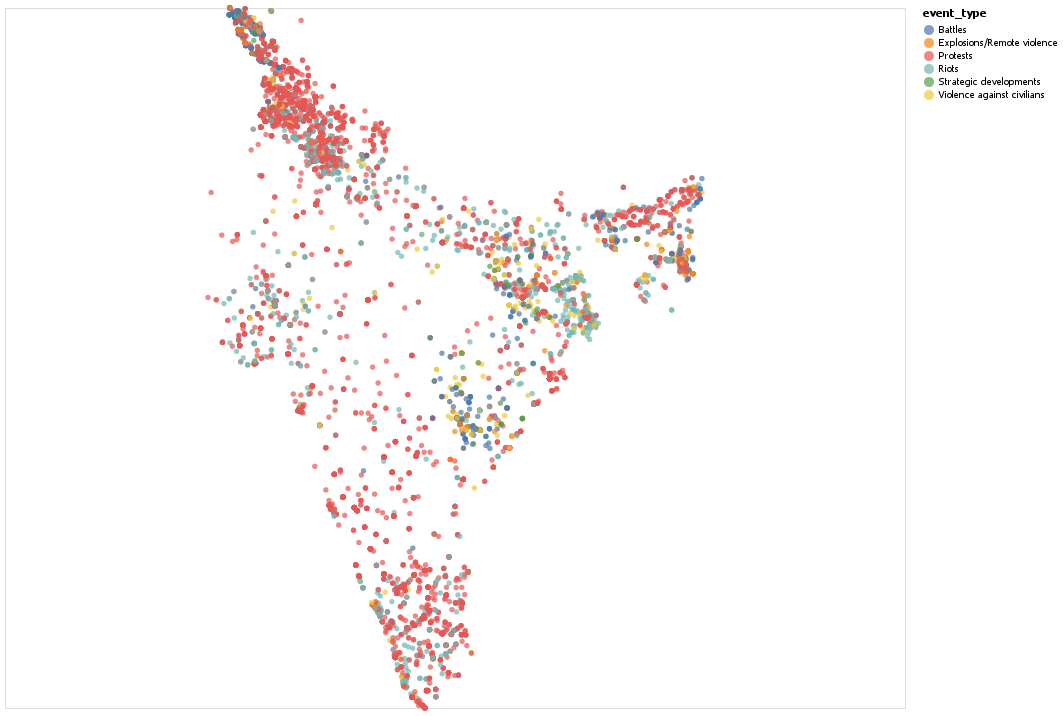

In [34]:
@vlplot(width=900, height=700) +
@vlplot(
    :circle,
    data=df_2016,
    projection={type=:equalEarth},
    longitude="longitude",
    latitude="latitude",
    color=:event_type,
    
)